<h1 style='font-size:2em; color:#2467C0'> Problem Statment 3 </h1>

Does the Complaint Type that you identified in response to question 1 have an obvious relationship with any particular characteristic or characteristics of the houses or buildings?<br>
<br>
This question can be answered by: <br>
1. visualing the matrices of correlation between Number of Cases and different building characteristics.
2. visualing the impact of the most impactful building characteristic on the number of cases.

*To answer the above questions, additional data set to be imported.*

### About dataset

This dataset will have the housing characteristic in BRONX. It can be downloaded from <a href = ' https://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/nyc_pluto_18v1.zip'> here </a>.

| Field          | Description                                                    |
|----------------|--------------------------------------------------------------  |
| Address        |The building's address.                                            |
| BldgDepth      |The building’s depth, which is the effective perpendicular distance, measured in feet. |
| BuiltFAR       |The BUILT FLOOR AREA RATIO is the total building floor area divided by the area of the tax lot.|
| LotArea        |Total area of the tax lot, expressed in square feet rounded to the nearest integer.|
| LotDepth       |The tax lot's depth measured in feet.|
| NumFloors      |The number of full and partial stories starting from the ground floor, for the tallest building on the tax lot.|
| ResArea        |An estimate of the exterior dimensions of the portion of the structure(s) allocated for residential use. |
| YearBuilt      |The year construction of the building was completed.|
| YearAlter1     |If a building has only been altered once, YEAR ALTERED 1 is the date that alteration began. |
| ZipCode        |The Y coordinate of the XY coordinate pair which depicts the approximate location of the lot. The XY coordinates are expressed in the New YorkLong Island State Plane coordinate system.|
| YCoord         |The Y coordinate of the XY coordinate pair which depicts the approximate location of the lot. The XY coordinates are expressed in the New YorkLong Island State Plane coordinate system. |
| XCoord         |The X coordinate of the XY coordinate pair which depicts the approximate location of the lot. The XY coordinates are expressed in the New YorkLong Island State Plane coordinate system. |

### Import Libraries

In [1]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
matplotlib.rcParams['figure.figsize'] = [20,9]

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np

### Ingest Data

In [3]:
df_bx = pd.read_csv(r'C:\Users\User\Downloads/BX_18v1.csv')
df= pd.read_csv(r'C:\Users\User\Downloads/fhrw-4uyv.csv')

C:\Users\User\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (19,20,22,23,64,65,80) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
df = df.loc[df['complaint_type'] == 'HEAT/HOT WATER']
df = df.loc[df['borough']=='BRONX']
df

,created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,address_type,city,resolution_description,borough,latitude,longitude,closed_date,location_type,status
2,2020-10-04T16:47:24.000,47780238,HEAT/HOT WATER,10469.0,2561 BRONXWOOD AVENUE,BRONXWOOD AVENUE,ADDRESS,BRONX,The Department of Housing Preservation and Dev...,BRONX,40.863994,-73.861626,2020-10-07T17:46:29.000,RESIDENTIAL BUILDING,Closed
14,2020-10-04T19:20:30.000,47781076,HEAT/HOT WATER,10463.0,3555 OXFORD AVENUE,OXFORD AVENUE,ADDRESS,BRONX,The Department of Housing Preservation and Dev...,BRONX,40.886026,-73.908863,2020-10-07T18:12:28.000,RESIDENTIAL BUILDING,Closed
20,2020-10-04T16:43:06.000,47781915,HEAT/HOT WATER,10453.0,1841 DR M L KING JR BOULEVARD,DR M L KING JR BOULEVARD,ADDRESS,BRONX,The following complaint conditions are still o...,BRONX,40.851565,-73.914365,2020-10-07T07:34:16.000,RESIDENTIAL BUILDING,Closed
61,2020-10-05T09:51:43.000,47785464,HEAT/HOT WATER,10474.0,1314 SENECA AVENUE,SENECA AVENUE,ADDRESS,BRONX,The complaint you filed is a duplicate of a co...,BRONX,40.818939,-73.886981,2020-10-07T02:06:53.000,RESIDENTIAL BUILDING,Closed
96,2020-10-05T19:52:45.000,47786725,HEAT/HOT WATER,10456.0,831 EAGLE AVENUE,EAGLE AVENUE,ADDRESS,BRONX,The Department of Housing Preservation and Dev...,BRONX,40.821220,-73.908833,2020-10-07T02:06:53.000,RESIDENTIAL BUILDING,Closed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6372916,2020-12-31T04:11:18.000,48540570,HEAT/HOT WATER,10453.0,1600 SEDGWICK AVENUE,SEDGWICK AVENUE,ADDRESS,BRONX,The Department of Housing Preservation and Dev...,BRONX,40.847902,-73.924288,2020-12-31T16:59:56.000,RESIDENTIAL BUILDING,Closed
6372930,2020-12-31T22:12:51.000,48538898,HEAT/HOT WATER,10458.0,2345 CROTONA AVENUE,CROTONA AVENUE,ADDRESS,BRONX,The following complaint conditions are still o...,BRONX,40.853256,-73.883970,NaN,RESIDENTIAL BUILDING,Open
6372932,2020-12-31T19:49:04.000,48541791,HEAT/HOT WATER,10458.0,311 BEDFORD PARK BOULEVARD,BEDFORD PARK BOULEVARD,ADDRESS,BRONX,The following complaint conditions are still o...,BRONX,40.869871,-73.885145,NaN,RESIDENTIAL BUILDING,Open
6372939,2020-12-31T22:53:31.000,48541719,HEAT/HOT WATER,10473.0,434 THIERIOT AVENUE,THIERIOT AVENUE,ADDRESS,BRONX,The complaint you filed is a duplicate of a co...,BRONX,40.813876,-73.860246,NaN,RESIDENTIAL BUILDING,Open


In [5]:
df_a = df['incident_address'].value_counts().to_frame().rename(columns={'incident_address':'case_count'})

In [6]:
df_bx = df_bx[['Address', 'BldgDepth', 'BuiltFAR','LotArea', 'LotDepth', 'NumFloors', 'ResArea', 'YearBuilt', 'YearAlter1', 'ZipCode', 'YCoord', 'XCoord']]
df_b = df_bx.copy(deep=True)

### Merge Datasets

In [7]:
df_c = pd.merge(left=df_a, right=df_b, left_on = df_a.index, right_on='Address', how='left')

#### Understanding Data

In [8]:
df_c['case_count'].sum()

459851

There are 459,851 cases here to be investigated in.

In [9]:
df_d = df_c.copy(deep=True)

In [10]:
df_d[['BldgDepth','BuiltFAR','LotArea', 'LotDepth', 'NumFloors', 'ResArea', 'YearBuilt', 'YearAlter1', 'ZipCode', 'YCoord', 'XCoord']]=df_d[['BldgDepth','BuiltFAR','LotArea', 'LotDepth', 'NumFloors', 'ResArea', 'YearBuilt', 'YearAlter1', 'ZipCode', 'YCoord', 'XCoord']].replace(np.nan, 0).astype('str')

In [11]:
df_d.describe(include='all')

,case_count,Address,BldgDepth,BuiltFAR,LotArea,LotDepth,NumFloors,ResArea,YearBuilt,YearAlter1,ZipCode,YCoord,XCoord
count,19272.000000,19272,19272,19272,19272,19272,19272,19272,19272,19272,19272,19272,19272
unique,NaN,19245,1060,709,5225,2586,39,6246,127,88,26,12501,11789
top,NaN,388 WILLIS AVENUE,0.0,0.0,0.0,100.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
freq,NaN,3,3608,3499,3417,5648,5180,4045,3520,16425,3406,3436,3436
mean,23.861094,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,98.893566,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,16.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There are certain attributes have more than 1,000 unique values (eg. LotArea, LotDepth & ResArea). 

<h1 style='font-size:2em; color:#2467C0'> BldgDepth </h1>

<AxesSubplot:xlabel='BldgDepth'>

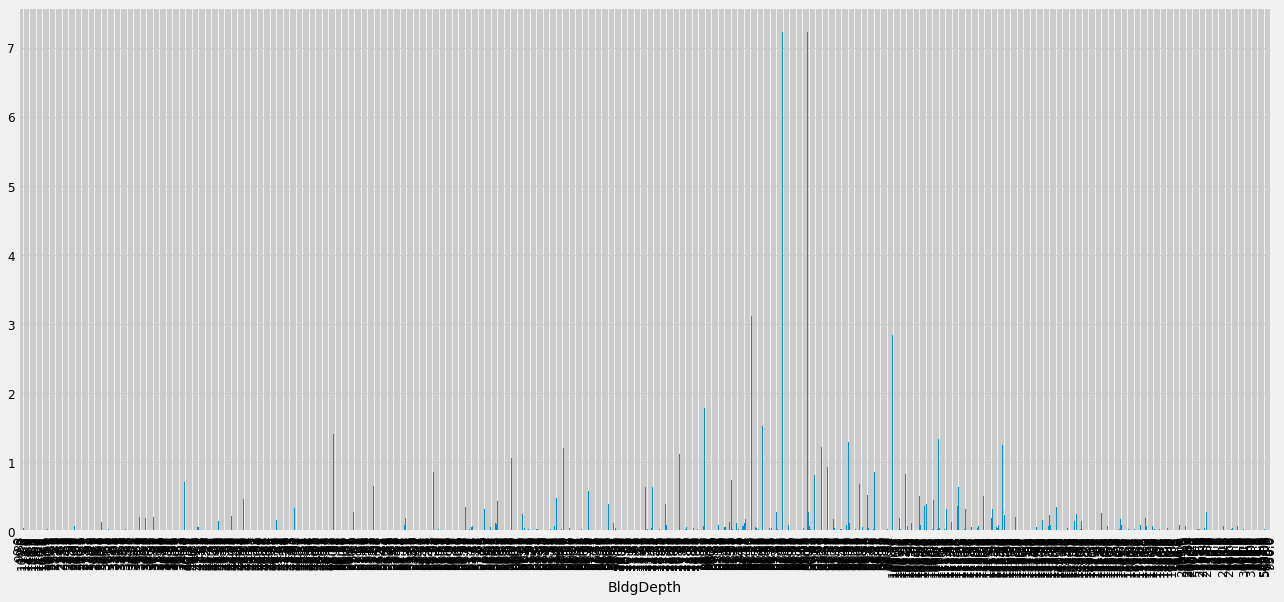

In [12]:
x = df_c[['case_count', 'BldgDepth']].groupby('BldgDepth').sum().sort_values('case_count', ascending=False)
case_sum = x['case_count'].sum()
x['weighted'] = x['case_count']*100/case_sum
x.sort_values('BldgDepth')['weighted'].plot(kind='bar')

In [13]:
x.index = x.index.map(str)
x[:212]['case_count'].sum()/x['case_count'].sum()

0.9345030367789078

In [14]:
x[:10]

,case_count,weighted
BldgDepth,,
88.0,28501,7.233701
90.0,28497,7.232686
87.0,22844,5.797925
84.0,12419,3.152006
85.0,12261,3.111905
100.0,11178,2.837034
80.0,7061,1.792118
86.0,6024,1.528922
75.0,5795,1.470801


In [15]:
print('The Cases Count has normal distribution between {} and {},'.format(x.index.min(), x.index.max()))
print('the Top 3 Most Complaint BldgDepth are {}, {} and {} ft,'.format(x.index[0], x.index[1], x.index[2]))
print('contributed  {:.2f}%, {:.2f}% and {:.2f}% of total number of complaint cases respectively.'.format(x['weighted'].loc[x.index[0]], x['weighted'].loc[x.index[1]], x['weighted'].loc[x.index[2]]))

The Cases Count has normal distribution between 0.0 and 99.94,
the Top 3 Most Complaint BldgDepth are 88.0, 90.0 and 87.0 ft,
contributed  7.23%, 7.23% and 5.80% of total number of complaint cases respectively.


BldgDepth: 
<li> From the plot, the weighted_case_count mostly came from Building with BldgDepth ranges between 84 and 100 ft. 
<li> Top 3 from BldgDepth are 88, 90, 87ft contributed around 20% of overall total cases.
<li> Top 6 can be considered as outliers as each of them contributed more than 2% while the others contributed only less than 2%.

<h1 style='font-size:2em; color:#2467C0'> BuiltFAR </h1>

<AxesSubplot:xlabel='BuiltFAR'>

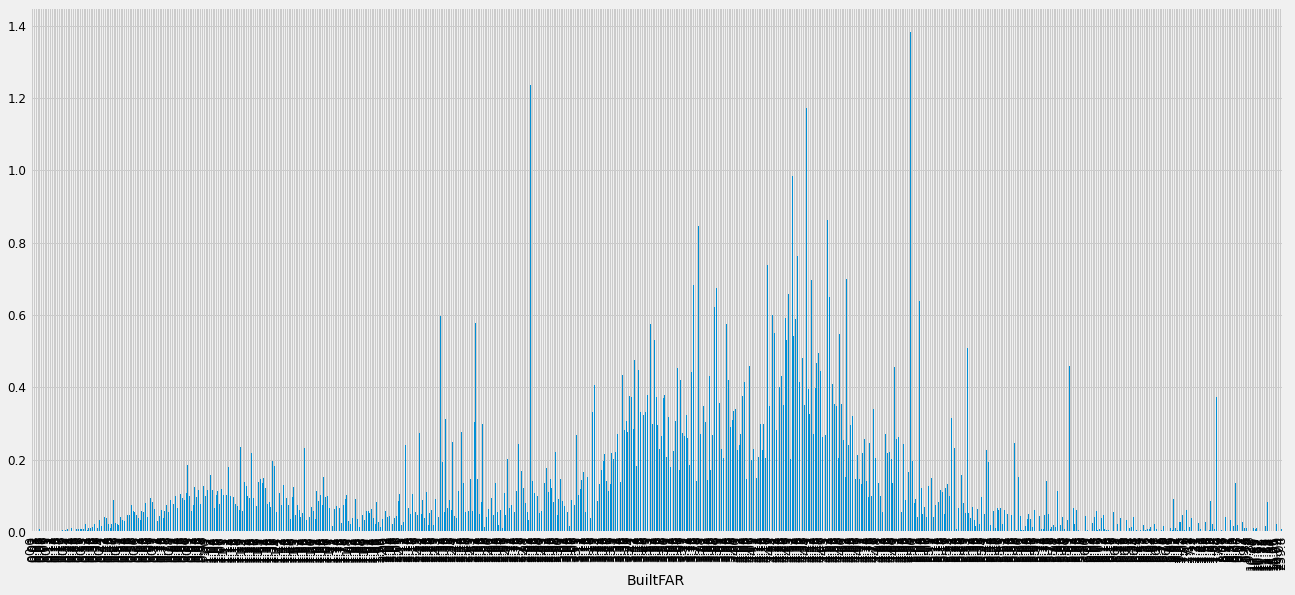

In [16]:
x = df_c[['case_count', 'BuiltFAR']].groupby('BuiltFAR').sum().sort_values('case_count', ascending=False)
case_sum = x['case_count'].sum()
x['weighted'] = x['case_count']*100/case_sum
x.sort_values('BuiltFAR')['weighted'].plot(kind='bar')

In [17]:
x.index = x.index.map(str)
x[:141]['case_count'].sum()/x['case_count'].sum()

0.6066197465501532

In [18]:
print('The Cases Count has normal distribution between {} and {},'.format(x.index.min(), x.index.max()))
print('the Top 3 Most Complaint BuiltFAR are {}, {} and {} ,'.format(x.index[0], x.index[1], x.index[2]))
print('contributed  {:.2f}%, {:.2f}% and {:.2f}% of total number of complaint cases respectively.'.format(x['weighted'].loc[x.index[0]], x['weighted'].loc[x.index[1]], x['weighted'].loc[x.index[2]]))

The Cases Count has normal distribution between 0.0 and 9.86,
the Top 3 Most Complaint BuiltFAR are 4.99, 4.24 and 2.84 ,
contributed  1.38%, 1.24% and 1.24% of total number of complaint cases respectively.


BuiltFAR:
<li> The weight_case_count are evenly distributed among the 709 unique, each of them contributed less than 1.5%. 

<h1 style='font-size:2em; color:#2467C0'> LotArea </h1>

<AxesSubplot:xlabel='LotArea'>

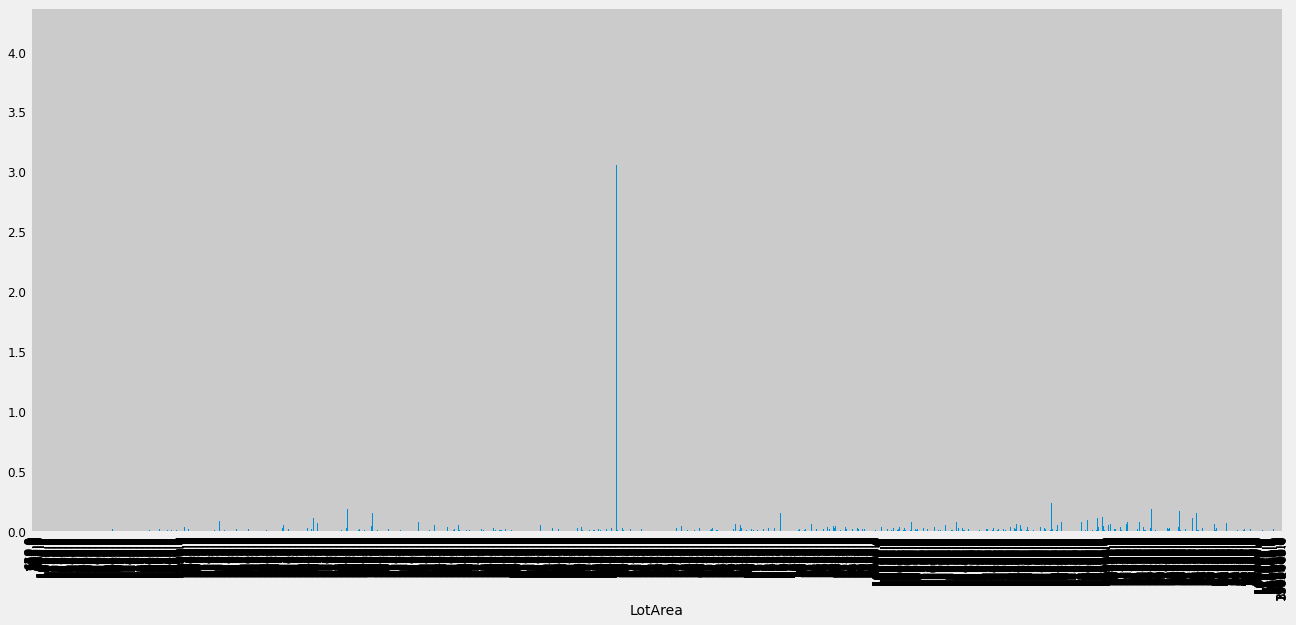

In [19]:
x = df_c[['case_count', 'LotArea']].groupby('LotArea').sum().sort_values('case_count', ascending=False)
case_sum = x['case_count'].sum()
x['weighted'] = x['case_count']*100/case_sum
x.sort_values('LotArea')['weighted'].plot(kind='bar')

In [20]:
print('The Cases Count has normal distribution between {} and {},'.format(x.index.min(), x.index.max()))
print('the Top 3 Most Complaint BuiltFAR are {}, {} and {} ,'.format(x.index[0], x.index[1], x.index[2]))
print('contributed  {:.2f}%, {:.2f}% and {:.2f}% of total number of complaint cases respectively.'.format(x['weighted'].loc[x.index[0]], x['weighted'].loc[x.index[1]], x['weighted'].loc[x.index[2]]))

The Cases Count has normal distribution between 0.0 and 3392065.0,
the Top 3 Most Complaint BuiltFAR are 10000.0, 2500.0 and 5000.0 ,
contributed  4.17%, 3.17% and 3.06% of total number of complaint cases respectively.


In [21]:
x.index = x.index.map(str)
x[:1045]['case_count'].sum()/x['case_count'].sum()

0.8226637868239582

In [22]:
x

,case_count,weighted
LotArea,,
10000.0,16428,4.169511
2500.0,12500,3.172565
5000.0,12056,3.059875
15000.0,6339,1.608871
12319.0,5317,1.349482
...,...,...
2547.0,1,0.000254
3653.0,1,0.000254
5196.0,1,0.000254


LotArea:
<li> The Top 3 contributors are 10000, 2500, 5000, contributed over 10% of overall case count. Other than these outliers, each of the other 5222 unique values contributed less than 1.6%. 

<h1 style='font-size:2em; color:#2467C0'> LotDepth </h1>

<AxesSubplot:xlabel='LotDepth'>

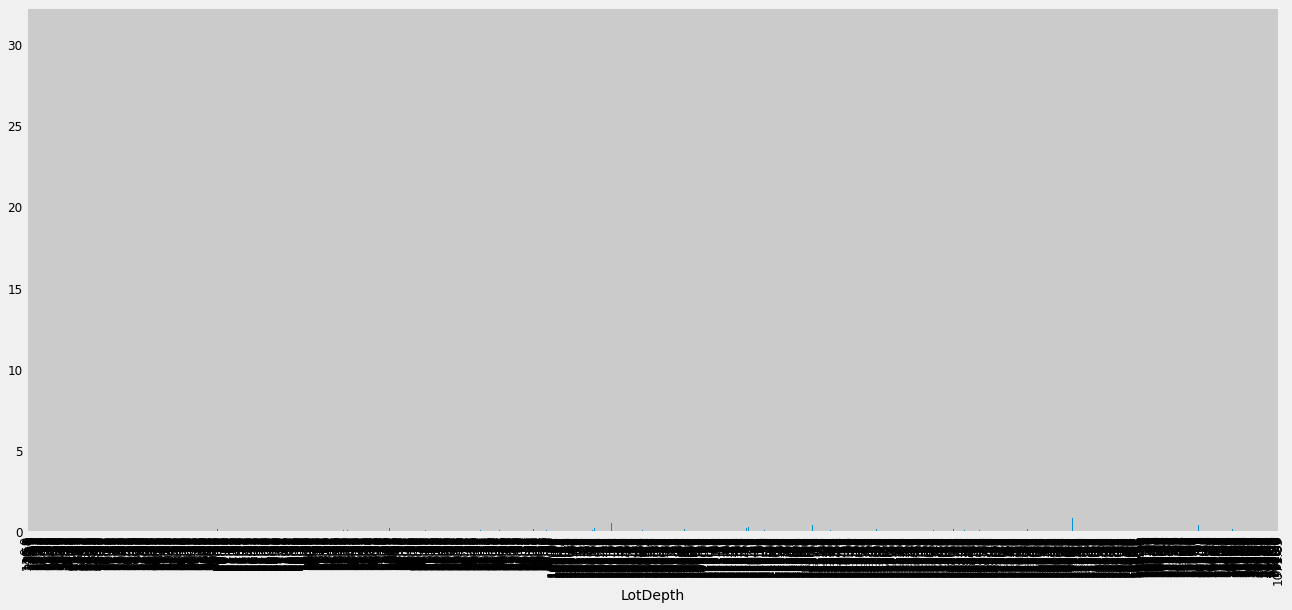

In [23]:
x = df_c[['case_count', 'LotDepth']].groupby('LotDepth').sum().sort_values('case_count', ascending=False)
case_sum = x['case_count'].sum()
x['weighted'] = x['case_count']*100/case_sum
x.index= x.index.map(float)
x.sort_values('LotDepth')['weighted'].plot(kind='bar')

In [24]:
x.index = x.index.map(str)
x[:517]['case_count'].sum()/x['case_count'].sum()

0.8970616974997653

In [25]:
print('The Cases Count has normal distribution between {} and {},'.format(x.index.min(), x.index.max()))
print('the Top 3 Most Complaint BuiltFAR are {}, {} and {} ,'.format(x.index[0], x.index[1], x.index[2]))
print('contributed  {:.2f}%, {:.2f}% and {:.2f}% of total number of complaint cases respectively.'.format(x['weighted'].loc[x.index[0]], x['weighted'].loc[x.index[1]], x['weighted'].loc[x.index[2]]))

The Cases Count has normal distribution between 0.0 and 99.97,
the Top 3 Most Complaint BuiltFAR are 100.0, 95.0 and 125.0 ,
contributed  30.80%, 3.28% and 2.05% of total number of complaint cases respectively.


In [26]:
x

,case_count,weighted
LotDepth,,
100.0,121338,30.796212
95.0,12909,3.276371
125.0,8068,2.047700
110.0,6812,1.728921
105.0,6221,1.578922
...,...,...
115.14,1,0.000254
115.68,1,0.000254
116.03,1,0.000254


LotDepth:
<li> The main contributor is 100ft contributed over 31% of the overall cases count. Then the weight_case_count are almost evenly distributed among the 2,585 unique values, each of them contributed less than 1.5%.

<h1 style='font-size:2em; color:#2467C0'> NumFloors </h1>

<AxesSubplot:xlabel='NumFloors'>

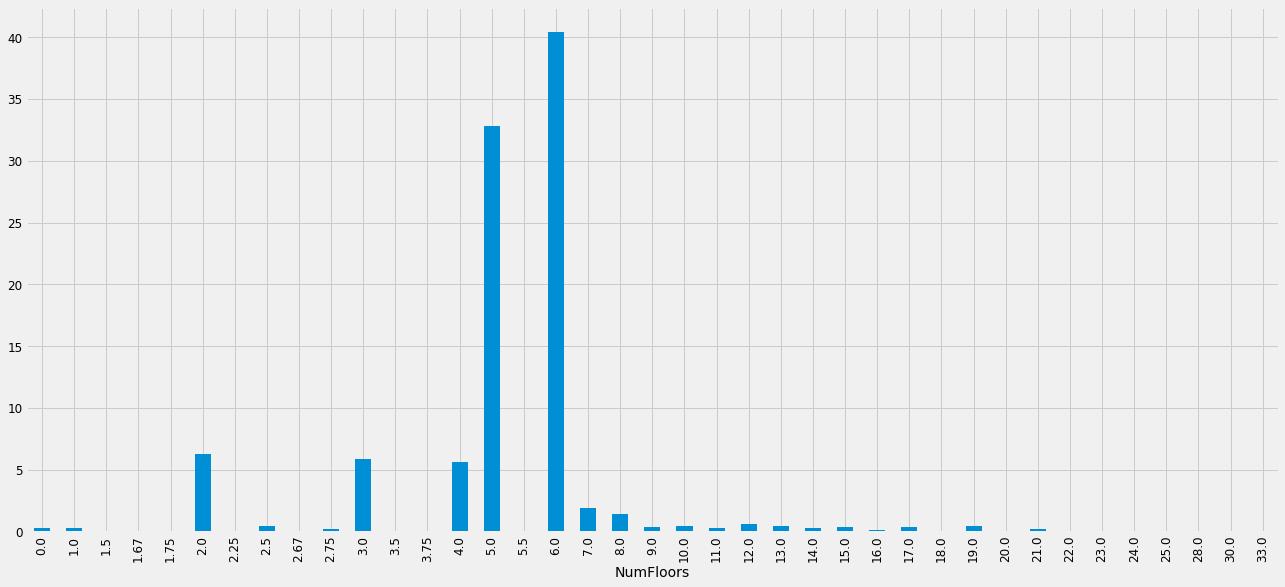

In [27]:
x = df_c[['case_count', 'NumFloors']].groupby('NumFloors').sum().sort_values('case_count', ascending=False)
case_sum = x['case_count'].sum()
x['weighted'] = x['case_count']*100/case_sum
x.index= x.index.map(float)
x.sort_values('NumFloors')['weighted'].plot(kind='bar')

In [28]:
x.index = x.index.map(str)
x[:8]['case_count'].sum()/x['case_count'].sum()

0.9498861683794286

In [29]:
print('The Cases Count has normal distribution between {} and {},'.format(x.index.min(), x.index.max()))
print('the Top 3 Most Complaint BuiltFAR are {}, {} and {} ,'.format(x.index[0], x.index[1], x.index[2]))
print('contributed  {:.2f}%, {:.2f}% and {:.2f}% of total number of complaint cases respectively.'.format(x['weighted'].loc[x.index[0]], x['weighted'].loc[x.index[1]], x['weighted'].loc[x.index[2]]))

The Cases Count has normal distribution between 0.0 and 9.0,
the Top 3 Most Complaint BuiltFAR are 6.0, 5.0 and 2.0 ,
contributed  40.43%, 32.85% and 6.25% of total number of complaint cases respectively.


NumFloors:
<li> The 2 main contributors are NumFloors 6.0 and 5.0, contributed almost 75% of total cases. 

<h1 style='font-size:2em; color:#2467C0'> ResArea </h1>

<AxesSubplot:xlabel='ResArea'>

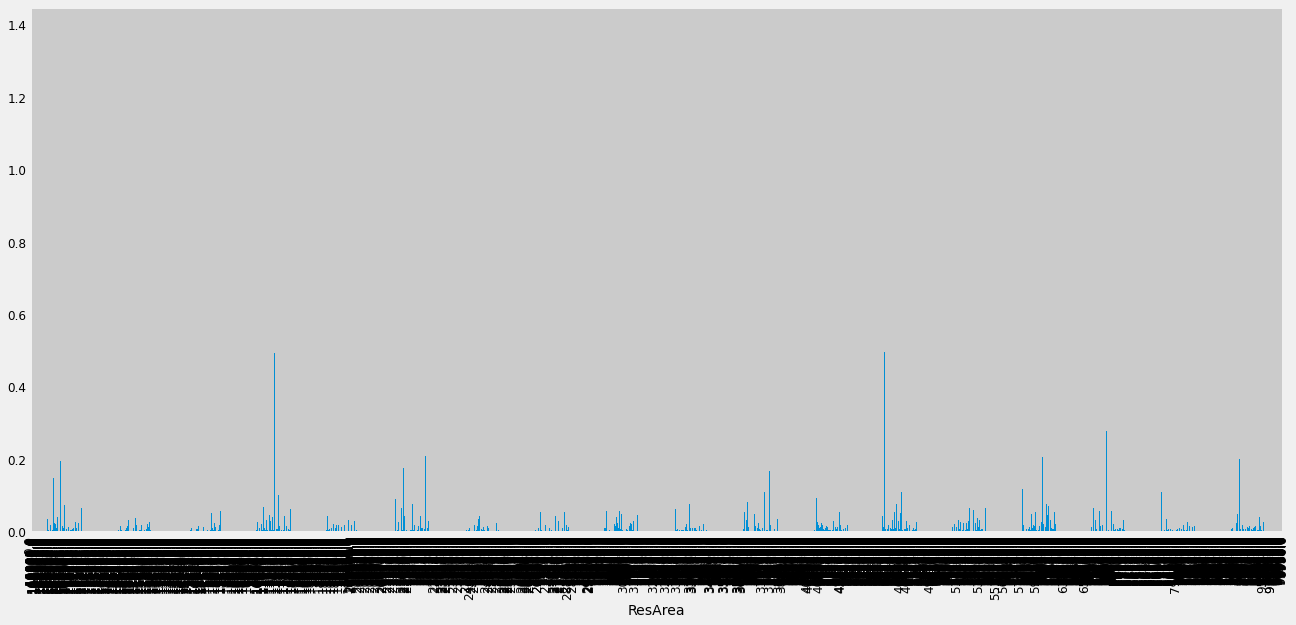

In [30]:
x = df_c[['case_count', 'ResArea']].groupby('ResArea').sum().sort_values('case_count', ascending=False)
case_sum = x['case_count'].sum()
x['weighted'] = x['case_count']*100/case_sum
x.index= x.index.map(str)
#x = x[:1250]
#x.index= x.index.map(float)
x.sort_values('ResArea')['weighted'].plot(kind='bar')

In [31]:
print('The Cases Count has normal distribution between {} and {},'.format(x.index.min(), x.index.max()))
print('the Top 3 Most Complaint BuiltFAR are {}, {} and {} ,'.format(x.index[0], x.index[1], x.index[2]))
print('contributed  {:.2f}%, {:.2f}% and {:.2f}% of total number of complaint cases respectively.'.format(x['weighted'].loc[x.index[0]], x['weighted'].loc[x.index[1]], x['weighted'].loc[x.index[2]]))

The Cases Count has normal distribution between 0.0 and 9990.0,
the Top 3 Most Complaint BuiltFAR are 61500.0, 48000.0 and 55650.0 ,
contributed  1.38%, 1.30% and 0.86% of total number of complaint cases respectively.


In [32]:
x.index = x.index.map(str)
x[:1250]['case_count'].sum()/x['case_count'].sum()

0.7575652977261594

In [33]:
x

,case_count,weighted
ResArea,,
61500.0,5442,1.381208
48000.0,5108,1.296437
55650.0,3393,0.861161
0.0,2768,0.702533
54000.0,2601,0.660147
...,...,...
3014.0,1,0.000254
3001.0,1,0.000254
2994.0,1,0.000254


ResArea:
<li>The weight_case_count are evenly distributed among the 6,246 unique values, each of them contributed less than 1.3%.

<AxesSubplot:xlabel='YearBuilt'>

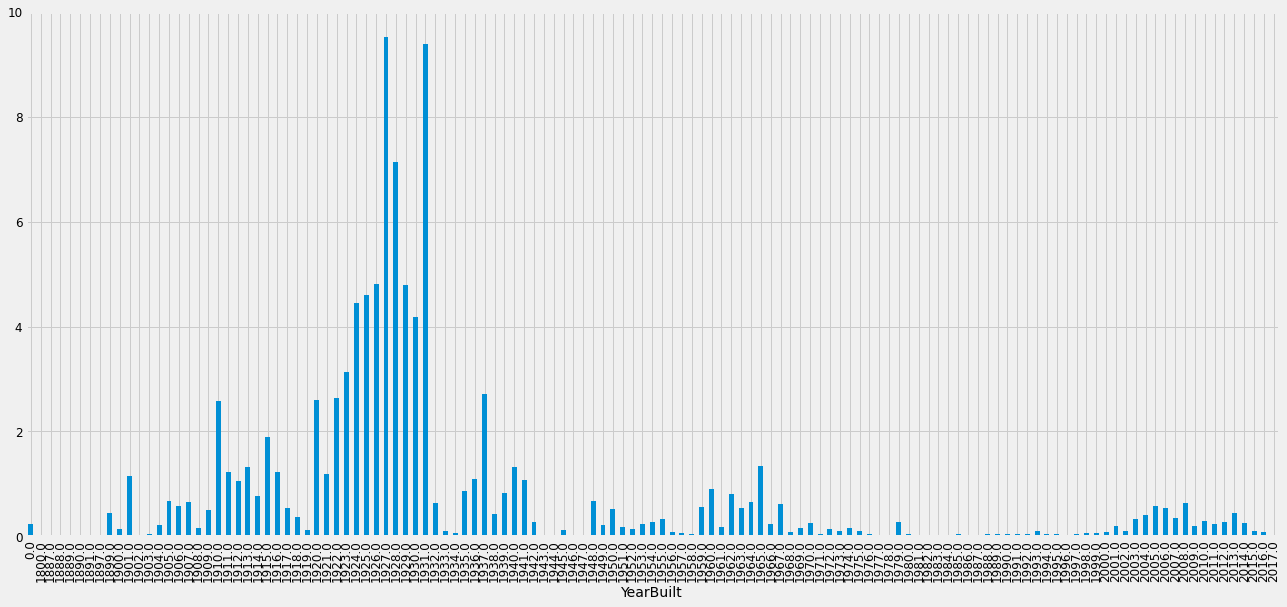

In [34]:
x = df_c[['case_count', 'YearBuilt']].groupby('YearBuilt').sum().sort_values('case_count', ascending=False)
case_sum = x['case_count'].sum()
x['weighted'] = x['case_count']*100/case_sum
x.sort_values('YearBuilt')['weighted'].plot(kind='bar')

In [35]:
x.index = x.index.map(str)
x[:25]['case_count'].sum()/x['case_count'].sum()

0.773463653830047

In [36]:
print('The Cases Count has normal distribution between {} and {},'.format(x.index.min(), x.index.max()))
print('the Top 3 Most Complaint BuiltFAR are {}, {} and {} ,'.format(x.index[0], x.index[1], x.index[2]))
print('contributed  {:.2f}%, {:.2f}% and {:.2f}% of total number of complaint cases respectively.'.format(x['weighted'].loc[x.index[0]], x['weighted'].loc[x.index[1]], x['weighted'].loc[x.index[2]]))

The Cases Count has normal distribution between 0.0 and 2017.0,
the Top 3 Most Complaint BuiltFAR are 1927.0, 1931.0 and 1928.0 ,
contributed  9.53%, 9.39% and 7.13% of total number of complaint cases respectively.


In [37]:
x[:10].sum()

case_count    215594.000000
weighted          54.718873
dtype: float64

YearBuilt:
<li>From the plot, the weighted_case_count mostly came from Building with YearBuilt ranges between 1924 and 1931, contributed (54% of total cases) and all of them are in Top 8 contributors.
<li>Top 3 from BldgDepth are 1927, 1931, 1928 contributed around 25% of overall total cases.

<h1 style='font-size:2em; color:#2467C0'> YearAlter1 </h1>

No of Rows in x is 88, 20% of 88 = 17.6


<AxesSubplot:xlabel='YearAlter1'>

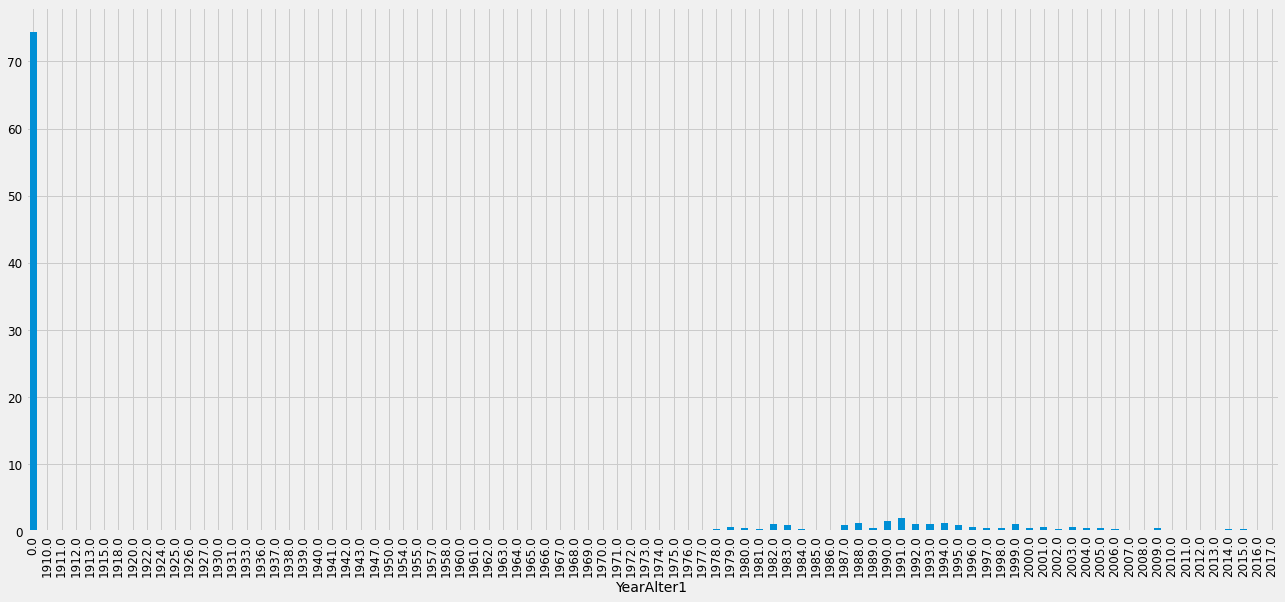

In [38]:
x = df_c[['case_count', 'YearAlter1']].groupby('YearAlter1').sum().sort_values('case_count', ascending=False)
case_sum = x['case_count'].sum()
x['weighted'] = x['case_count']*100/case_sum
print('No of Rows in x is {}, 20% of {} = {}'.format(x.shape[0], x.shape[0], x.shape[0]*0.2))
x.sort_values('YearAlter1')['weighted'].plot(kind='bar')

In [39]:
x.index = x.index.map(str)
x[:18]['case_count'].sum()/x['case_count'].sum()

0.9154651106717462

In [40]:
print('The Cases Count has normal distribution between {} and {},'.format(x.index.min(), x.index.max()))
print('the Top 3 Most Complaint BuiltFAR are {}, {} and {} ,'.format(x.index[0], x.index[1], x.index[2]))
print('contributed  {:.2f}%, {:.2f}% and {:.2f}% of total number of complaint cases respectively.'.format(x['weighted'].loc[x.index[0]], x['weighted'].loc[x.index[1]], x['weighted'].loc[x.index[2]]))

The Cases Count has normal distribution between 0.0 and 2017.0,
the Top 3 Most Complaint BuiltFAR are 0.0, 1991.0 and 1990.0 ,
contributed  74.44%, 2.05% and 1.58% of total number of complaint cases respectively.


In [41]:
x.index = x.index.map(str)
x[:18]['case_count'].sum()/x['case_count'].sum()

0.9154651106717462

In [42]:
x

,case_count,weighted
YearAlter1,,
0.0,293296,74.440042
1991.0,8060,2.045670
1990.0,6243,1.584506
1988.0,5209,1.322071
1994.0,4765,1.209382
...,...,...
1924.0,1,0.000254
1925.0,1,0.000254
1931.0,1,0.000254


YearAlter1:
<li> Most (74%) of the complaints came from building with YearAlter1 = 0.0 (the building have not been altered). 
<li> YearAlter1 = 1991 contributed 2% of the total complaints.

<h1 style='font-size:2em; color:#FF8C00'> Conclusion: </h1>

The building characteristic that is relatively strongly related the case count is NumFloors. Most of the complaints (75% of total cases) came from Building with NumFloors of 5.0 and 6.0. <br>
The building characteristic YearAlter1 also stated that most complaints (70% of total cases) came from buildings that have not been altered before. <br>
The building characteristic YearBuilt stated that most complaints (54% of total cases) came from those with YearBuilt ranges between 1924 and 1931. <br>
There are some outliers in most attributes(building characteristics) including BldgDepth, LotDepth and LotArea. <br>
In the others (BuiltFAR, ResArea), the complaints are considerably evenly distributed among the unique values. <br>